# Logistic Regression from scratch

Logistic Regression is a generalized Linear Regression in the sense that we don’t output the weighted sum of inputs directly, but we pass it through a function that can map any real value between 0 and 1. When the number of possible outcome is only two it is called **Binary Logistic Regression**.

## Generating Data

I will be using simulated data by sampling from a multivariate normal distribution.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, 0.75], [0.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.75], [0.75, 1]], num_observations)

simulated_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), 
                              np.ones(num_observations)))

In [58]:
simulated_features.shape

(10000, 2)

In [59]:
simulated_labels.shape

(10000,)

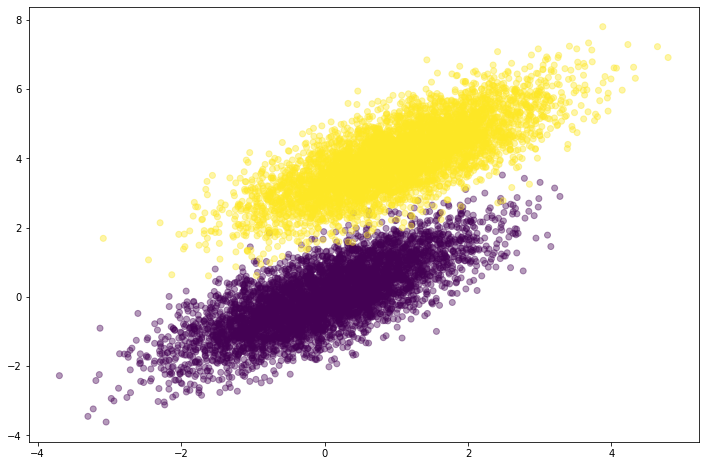

In [60]:
# Visualizing the data

plt.figure(figsize = (12, 8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1], c = simulated_labels, alpha = 0.4)

## Defining the activation function

In order to map predicted values to probabilities, we use the sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

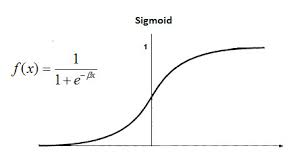

In [0]:
def sigmoid(scores):
  return 1 / (1 + np.exp(-scores))

## Maximizing the Likelihood

In logistics regression, we're essentially finding the weights that maximize the likelihood of producing our given data and use them to categorize the response variable. The maximum likelihood approach to fitting a logistic regression model both aids in better understanding the form of the logistic regression model and provides a template that can be used for fitting classification models more generally. 

Since the likelihood maximization doesn't have a closed form solution, I'll solve the optimization problem with gradient ascent(maximizing insted of minimizing a fuction like in gradient descent). 

![alt text](https://render.githubusercontent.com/render/math?math=%5Cbegin%7Bequation%7D%0All%20%3D%20%5Csum_%7Bi%3D1%7D%5E%7BN%7Dy_%7Bi%7D%5Cbeta%20%5E%7BT%7Dx_%7Bi%7D%20-%20log%281%2Be%5E%7B%5Cbeta%5E%7BT%7Dx_%7Bi%7D%7D%29%0A%5Cend%7Bequation%7D&mode=display)

In [0]:
def log_likelihood(features, target, weights):
  scores = np.dot(features, weights)
  log_like = np.sum(target*scores - np.log(1 + np.exp(scores)))
  return log_like

## Building the Logistic Regression Function

In [0]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
  if add_intercept:
    intercept = np.ones((features.shape[0], 1))
    features = np.hstack((intercept, features))

  weights = np.zeros(features.shape[1])

  for step in range(num_steps):
    scores = np.dot(features, weights)
    predictions = sigmoid(scores)

    # Updating weights
    output_error = target - predictions
    gradient = np.dot(np.transpose(features), output_error)
    weights += learning_rate * gradient

    # Print log-likelihood after certain steps
    if step % 100000 == 0:
      print(log_likelihood(features, target, weights))

  return weights

In [64]:
# Run the model on simulated data

weights_scratch = logistic_regression(simulated_features, simulated_labels, 
                              num_steps = 600000, learning_rate = 4e-6, 
                              add_intercept = True)

-6523.298215406412
-156.2644110176364
-150.71771845081278
-149.46559990052174
-149.07357130591785
-148.93299789355967


In [71]:
print(weights_scratch)

[-12.45360565  -4.5762432    7.54472633]


## Comparing with Sklearn's Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_features, simulated_labels)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
print('Intercept: ',clf.intercept_)
print('Gradient: ', clf.coef_)
print('Weight: ', np.hstack((clf.intercept_[:, None], clf.coef_)))

Intercept:  [-12.66559242]
Gradient:  [[-4.65707478  7.67331116]]
Weight:  [[-12.66559242  -4.65707478   7.67331116]]


## Comparing accuracies of Scratch and Sklearn model

In [68]:
data = np.hstack((np.ones((simulated_features.shape[0], 1)),
                          simulated_features))
final_scores = np.dot(data, weights_scratch)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float)/len(preds)))
print('Accuracy from sklearn: {0}'.format(clf.score(simulated_features, simulated_labels)))

# Because of the relatively seperable data we acheive high accuracies

Accuracy from scratch: 0.9937
Accuracy from sklearn: 0.9937


## Visualizing the predictions

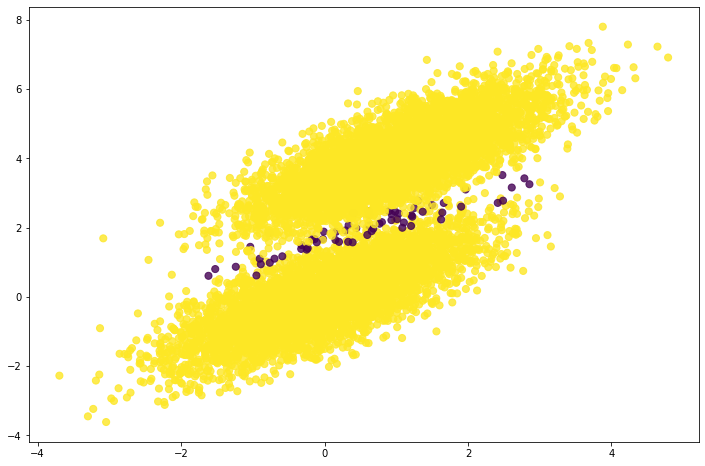

In [69]:
# Because of the relatively seperable data the only incorrect predictions were
# in the middle between the clusters. 
# Purple points are the incorect predictions and yellow are the correct ones.
plt.figure(figsize = (12, 8))
plt.scatter(simulated_features[:, 0], simulated_features[:, 1],
            c = (preds == simulated_labels), alpha = 0.8, s = 50)